### X-plane Data

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_files = ['data_83ZPMZ', 'data_J3R1AN', 'data_JDTIIW', 'data_JRBWU8', 'data_KE2NXM', 'data_MP86LC', 'data_ONDPDQ']
filename = ('./xplane_data/all_refs/{}/data.csv').format(data_files[0])

In [79]:
# csvfile = pd.read_csv(filename)
df = pd.read_csv(filename)
df.fillna(method='ffill', inplace=True)
# # as some of the value begins with Nah, the first row is deleted
df = df.drop([0], axis=0)
df.shape
# # Warnings are shown because NaNs exist

/Users/sue/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (20,48,56,133,266,267,268,269,270,271,272,273,274,275,276,277,280,283,290,291,298,299,300,322,323,324,325,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,393,394,395,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,415,416,417,449,457,459,468,474,508,509,510,511,512,513,514,515,516,517,544,551,560,574,575,579,580,581,583,584,585,595,596,598,765,802,804,805,808,842,843,845,855,856,857,861,865,869,871,874,879,880,881,883,893,895,899,900,930,940,941,943,952,953,954,958,962,967,969,973,978,979,980,982,993,995,999,1000,1105,1107,1109,1114,1117,1118,1119,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1144,1145,1146,1148,1149,1150,1152,1154,1155,1157,1166,1171,1174,1176,

(611, 4120)

In [80]:
# if any colum still has np.nan, that line is not used
def dropnull(df):
    while df.isnull().values.any():
        drop_col = pd.isnull(df).any(0).nonzero()[0]
        print (drop_col)
        df.drop(df.columns[drop_col[0]], axis=1, inplace=True)
#     print(df.isnull().values.any())

In [81]:
dropnull(df)
# list(df.columns.values)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)
# chosen_data.head()
df_series = df.nunique(axis=0) != 1
df = df[df.columns[df_series]]
df.shape

[1246]


(611, 478)

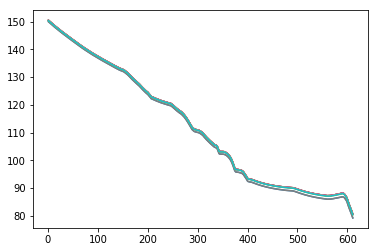

In [82]:
chosen_data = df[df.columns[20:30]]
plt.plot(chosen_data)
plt.show()

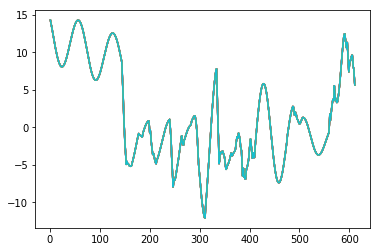

In [83]:
chosen_data = df[df.columns[30:40]]
plt.plot(chosen_data)
plt.show()

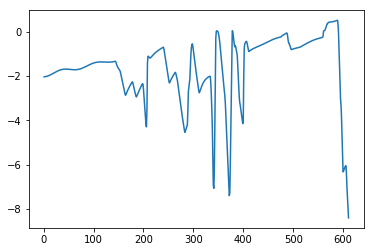

In [84]:
chosen_data = df[df.columns[54]]
plt.plot(chosen_data)
plt.show()

#### Selected data columns:
new df[21, 31, 54]

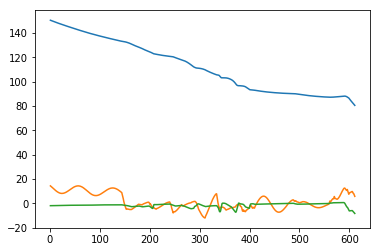

In [85]:
final_data = df[df.columns[[21,31,54]]]
plt.plot(final_data)
plt.show()
final_data.to_csv(index=False, path_or_buf='selected_sensors.csv')

In [95]:
sth = pd.Series(final_data[final_data.columns[0]]).values
isinstance(sth, np.ndarray)

True